In [2]:
import geopandas

gdf = geopandas.read_file("data/sydney.geojson")
gdf.head(1)

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
# df = pd.read_csv("/content/zomato_df_final_data.csv")

df = geopandas.read_file('data/zomato_df_final_data.csv', GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [5]:
# fixing lat and lng values
# i have some missing values as well
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')

In [6]:
df = df.dropna(subset=['lat', 'lng'])

In [7]:
# making geometry column for the join
# getting points not polygon
from shapely.geometry import Point
df['geometry'] = df.apply(lambda row: Point(row['lng'], row['lat']), axis=1)
df.head(1)


,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color,geometry
0,"371A Pitt Street, CBD, Sydney",50,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4,Very Good,CBD,Sydney Madang,['Casual Dining'],1311,FALSE,#e15307,5.243902439,#6f706b,POINT (151.20760 -33.87606)


In [8]:
# spatial join
# how = right
# so it will keep all the gdf columns
# cuisine will have some non-string values
# because relationship is one to many index value will repeat
result = geopandas.sjoin(df, gdf, how='right', op='within')
result.head(2)

,index_left,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,...,votes,groupon,color,cost_2,cuisine_color,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,2697.0,"745-899 Elizabeth Drive, Bonnyrigg, Sydney",130,"['Italian', 'Pizza', 'Tapas']",-33.881260,https://www.zomato.com/sydney/amorettis-bonnyrigg,150.859422,02 8786 1777,3.3,Average,...,65,FALSE,#fd9243,11.42276423,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
0,6411.0,"Shop 4, 60-68 Stockdale Crescent, Abbotsbury,...",78,"['Italian', 'Pizza']",-33.869781,https://www.zomato.com/sydney/8-slices-pizzari...,150.865070,(02) 9610 9910,3,Average,...,18,FALSE,#fdab66,7.406504065,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."


In [9]:
# count = 0
# for val in result["cuisine"]:
#   if isinstance(val, str):
#     count = count
#   else:
#     count+=1
# print(count)

In [10]:
# convert to str
result["cuisine"] = result["cuisine"].astype(str)

In [11]:
# fixing index
result = result.reset_index(drop=True)
result = result.drop(columns=["index_left"])

In [12]:
result.columns

Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color', 'SSC_CODE', 'SSC_NAME',
       'CONF_VALUE', 'SQKM', 'geometry'],
      dtype='object')

In [13]:
result = result.drop(columns=["address", "cost", "link", "phone", "rating_number", "rating_text",  'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'])

In [14]:
result.head(3)

,cuisine,lat,lng,subzone,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,"['Italian', 'Pizza', 'Tapas']",-33.881260,150.859422,Bonnyrigg,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,"['Italian', 'Pizza']",-33.869781,150.865070,Bonnyrigg,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
2,"['Latin American', 'Fusion']",-33.850952,151.129112,Abbotsford,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."


In [15]:
# test
# plot all suburbs with indian cuisine
# not heat map
#create subset with indian cuisine
indian_restaurant_suburbs = result[result['cuisine'].str.contains("Indian")]

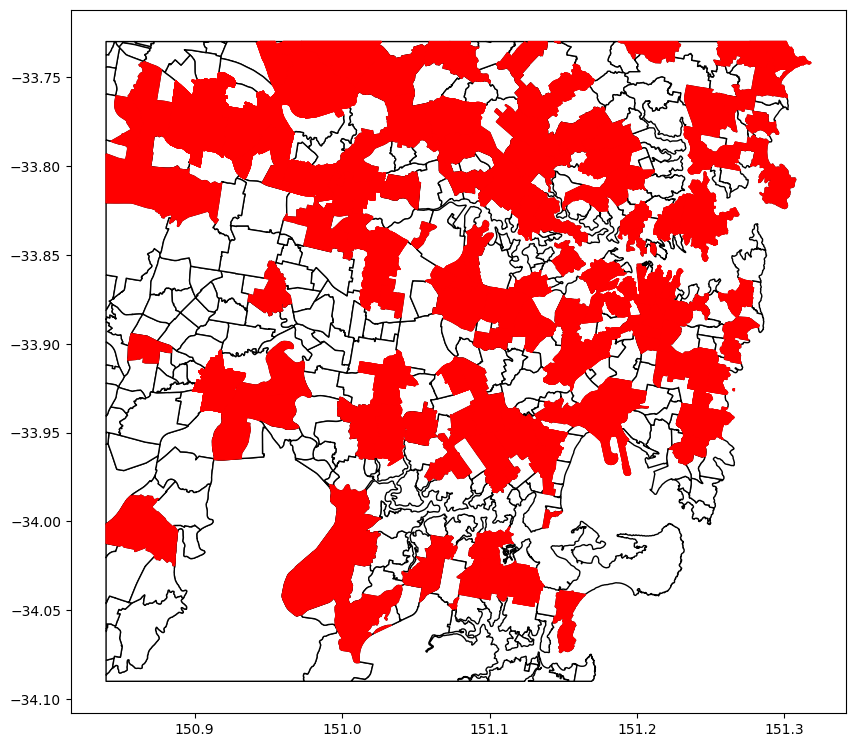

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot("SQKM", ax=ax, color='white', edgecolor = "black")
indian_restaurant_suburbs.plot("SQKM", ax=ax, color='red', edgecolor = "red")
plt.show()

In [17]:
temp = indian_restaurant_suburbs["SSC_CODE"].value_counts()
sub_count = pd.DataFrame({"SSC_CODE": temp.index, "count": temp.values})
sub_count

,SSC_CODE,count
0,11078,23
1,12192,13
2,10240,13
3,11390,12
4,11844,11
...,...,...
136,10862,1
137,10825,1
138,10794,1
139,10787,1


In [18]:
indian_restaurant_suburbs.shape

(335, 9)

In [19]:
# will keep 1 suburb entry for restaurants
temp = indian_restaurant_suburbs.drop_duplicates(subset= "SSC_CODE")
temp.head(3)

,cuisine,lat,lng,subzone,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
79,['Indian'],-33.765547,151.250215,Brookvale,10025,Allambie Heights,Very good,6.708513,"POLYGON ((151.25097 -33.75696, 151.25096 -33.7..."
87,['Indian'],-33.969999,151.113583,Hurstville,10027,Allawah,Very good,0.624729,"POLYGON ((151.10876 -33.97265, 151.10874 -33.9..."
90,['Indian'],-33.887891,151.163864,Annandale,10039,Annandale (NSW),Very good,1.488626,"POLYGON ((151.16836 -33.87822, 151.16838 -33.8..."


In [20]:
indian = pd.merge(temp, sub_count, on = "SSC_CODE", how = "outer")
indian.head(5)

,cuisine,lat,lng,subzone,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry,count
0,['Indian'],-33.765547,151.250215,Brookvale,10025,Allambie Heights,Very good,6.708513,"POLYGON ((151.25097 -33.75696, 151.25096 -33.7...",1
1,['Indian'],-33.969999,151.113583,Hurstville,10027,Allawah,Very good,0.624729,"POLYGON ((151.10876 -33.97265, 151.10874 -33.9...",1
2,['Indian'],-33.887891,151.163864,Annandale,10039,Annandale (NSW),Very good,1.488626,"POLYGON ((151.16836 -33.87822, 151.16838 -33.8...",2
3,['Indian'],-33.937245,151.146318,Arncliffe,10054,Arncliffe,Very good,2.923780,"POLYGON ((151.14307 -33.94394, 151.14246 -33.9...",1
4,['Indian'],-33.808315,151.183477,Artarmon,10058,Artarmon,Very good,2.671590,"POLYGON ((151.17547 -33.81212, 151.17547 -33.8...",1


In [21]:
# # Plot the GeoDataFrame
# subzone_gdf.plot(column='count', cmap='YlGnBu', legend=True, figsize=(12, 8))
# plt.title("Subzone Cuisine Occurrences")
# plt.axis('off')  # Turn off axis

# plt.show()

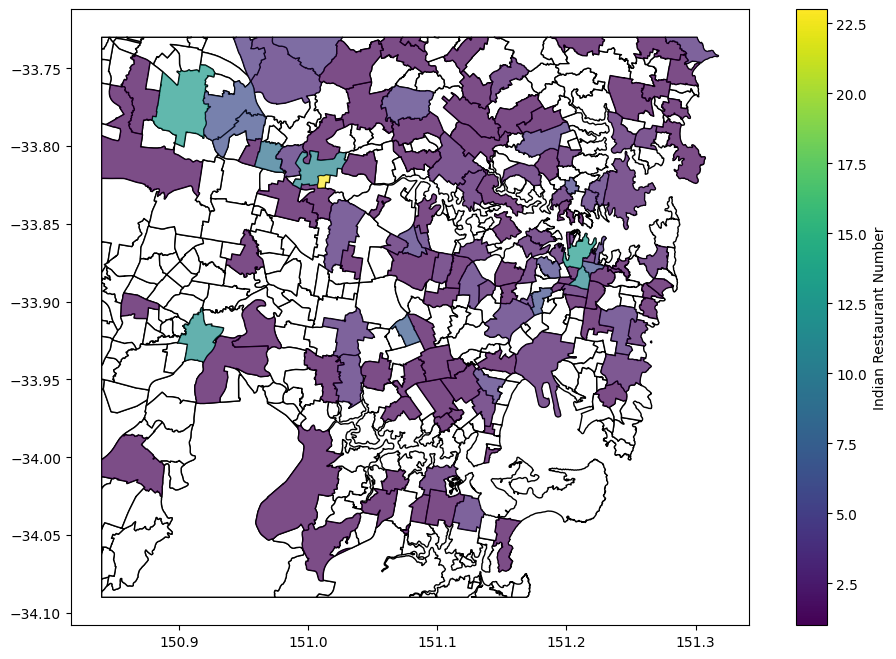

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot("SQKM", ax=ax, color='white', edgecolor = "black")
indian.plot(column='count', cmap='viridis', linewidth=0.5, ax=ax, legend=True, edgecolor='k', alpha=0.7, legend_kwds={'label': "Indian Restaurant Number"})

# Add count annotations on top of each polygon
# for x, y, count in zip(subzone_gdf.geometry.centroid.x, subzone_gdf.geometry.centroid.y, subzone_gdf['count']):
#     ax.annotate(int(count), xy=(x, y), xytext=(3, 3), textcoords="offset points", color="black", fontsize=10, ha='center', va='center')
plt.show()

In [23]:
indian.SSC_CODE = indian.SSC_CODE.astype(str)

In [25]:
import plotly.express as px

In [ ]:
fig = px.choropleth_mapbox(indian,
                           geojson=gdf.geometry,
                           locations=indian.SSC_CODE,
                           color="count",
                           hover_name = "subzone",
                           hover_data = ["count"],
                           mapbox_style="carto-positron",
                           center = dict(lat= -33.85 , lon=151.2153)
                           )
fig.show()